In [27]:
#loading ema workbench and packages

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import csv

from __future__ import (division, unicode_literals, print_function, absolute_import)

from ema_workbench import (Model, RealParameter, TimeSeriesOutcome, ScalarOutcome, 
                           perform_experiments, ema_logging, Constant, load_results, 
                            MultiprocessingEvaluator, IpyparallelEvaluator
                          )
from ema_workbench.em_framework.parameters import Policy, create_parameters
from ema_workbench.connectors.vensim import VensimModel, LookupUncertainty, VensimModelStructureInterface
from ema_workbench.em_framework.evaluators import (LHS, SOBOL, MORRIS, MC)
from ema_workbench.util import save_results, ema_logging, CaseError
from ema_workbench.analysis.plotting import lines, envelopes
from ema_workbench.analysis.plotting_util import KDE, BOXPLOT, HIST, VIOLIN
from ema_workbench.analysis.pairs_plotting import pairs_lines, pairs_scatter
from ema_workbench.em_framework.parameters import Policy
from ema_workbench.em_framework import CategoricalParameter

from ema_workbench.analysis import prim

ema_logging.log_to_stderr(ema_logging.INFO)

C:\Users\martijn.legene\AppData\Local\Continuum\anaconda3\lib\site-packages\ema_workbench\em_framework\optimization.py:22: ImportWarning: platypus based optimization not available
  warnings.warn("platypus based optimization not available", ImportWarning)
C:\Users\martijn.legene\AppData\Local\Continuum\anaconda3\lib\site-packages\ema_workbench\connectors\__init__.py:18: ImportWarning: netlogo connector not available
  warnings.warn("netlogo connector not available", ImportWarning)
C:\Users\martijn.legene\AppData\Local\Continuum\anaconda3\lib\site-packages\ema_workbench\connectors\__init__.py:23: ImportWarning: pysd connector not available
  warnings.warn("pysd connector not available", ImportWarning)


<Logger EMA (DEBUG)>

In [28]:
results = load_results(r'PRIM results/no_policy_experiments_PRIM_5000.tar.gz')

[MainProcess/INFO] results loaded succesfully from C:\Users\martijn.legene\EMA TESTS\PRIM results\no_policy_experiments_PRIM_5000.tar.gz


In [29]:
def classify(outcomes):
    #get the output for variables you want
    resultroadcitycenter = outcomes['Fraction road per district type[City center]']
    #make an empty array of length equal to number of cases
    classesroadcitycenter =  np.zeros(resultroadcitycenter.shape[0])
    #if higher than initial value, classify as 1 
    classesroadcitycenter[resultroadcitycenter[:, -1] > 0.061] = 1 #0 cases of interest
#    classesroadcitycenter[resultroadcitycenter[:, -1] > 0.06] = 1 #4 restricted dimensions, 33 boxes
    return classesroadcitycenter

In [ ]:
def classify(outcomes):
    #get the output for variables you want
    resultroadurban = outcomes['Fraction road per district type[Other urban districts]']
    #make an empty array of length equal to number of cases
    classesroadurban =  np.zeros(resultroadurban.shape[0])
    #if higher than initial value, classify as 1 
#    classesroadurban[resultroadurban[:, -1] > 0.042] = 1 #0 cases of interest
    classesroadurban[resultroadurban[:, -1] < 0.04] = 1 #1 restricted dimension, 4 boxes
    return classesroadurban

In [ ]:
def classify(outcomes):
    #get the output for variables you want
    resultparkingcitycenter = outcomes['Fraction parking per district type[City center]']
    #make an empty array of length equal to number of cases
    classesparkingcitycenter =  np.zeros(resultparkingcitycenter.shape[0])
    #if higher than initial value, classify as 1 
#    classesparkingcitycenter[resultparkingcitycenter[:, -1] > 0.108] = 1 #0 cases of interest
    classesparkingcitycenter[resultparkingcitycenter[:, -1] < 0.099] = 1 #2 restricted dimensions, 10 boxes
    return classesparkingcitycenter

In [ ]:
def classify(outcomes):
    #get the output for variables you want
    resultparkingurban = outcomes['Fraction parking per district type[Other urban districts]']
    #make an empty array of length equal to number of cases
    classesparkingurban =  np.zeros(resultparkingurban.shape[0])
    #if lower than initial value, classify as 1 
#    classesparkingurban[resultparkingurban[:, -1] > 0.110] = 1 #0 cases of interest
    classesparkingurban[resultparkingurban[:, -1] < 0.1045] = 1 #1 restricted dimension, 4 boxes
    return classesparkingurban

In [ ]:
def classify(outcomes):
    #get the output for variables you want
    resultdistancecitycenter = outcomes['Distance within acceptable travel time per district type[City center]']
    #make an empty array of length equal to number of cases 
    classesdistancecitycenter =  np.zeros(resultdistancecitycenter.shape[0])
    #if lower than initial value, classify as 1 
#    classesdistancecitycenter[resultdistancecitycenter[:, -1] < 26.96] = 1 #0 cases of interest
    classesdistancecitycenter[resultdistancecitycenter[:, -1] > 45] = 1 #2 restricted dimensions, 11 boxes
    return classesdistancecitycenter

In [ ]:
def classify(outcomes):
    #get the output for variables you want
    resultdistanceurban = outcomes['Distance within acceptable travel time per district type[Other urban districts]']
    #make an empty array of length equal to number of cases 
    classesdistanceurban =  np.zeros(resultdistanceurban.shape[0])
    #if lower than initial value of, classify as 1 
#    classesdistanceurban[resultdistanceurban[:, -1] < 26.88] = 1 #0 cases of interest
    classesdistanceurban[resultdistanceurban[:, -1] > 45] = 1 #1 restricted dimension, 4 boxes
    return classesdistanceurban

In [ ]:
def classify(outcomes):
    #get the output for variables you want
    resultdistancesuburbs = outcomes['Distance within acceptable travel time per district type[Suburbs]']
    #make an empty array of length equal to number of cases 
    classesdistancesuburbs =  np.zeros(resultdistancesuburbs.shape[0])
    #if lower than initial value, classify as 1 
#    classesdistancesuburbs[resultdistancesuburbs[:, -1] < 37.42] = 1 #0 cases of interest
    classesdistancesuburbs[resultdistancesuburbs[:, -1] > 60] = 1 #1 restricted dimension, 4 boxes
    return classesdistancesuburbs

In [ ]:
def classify(outcomes):
    #get the output for variables you want
    resultsaturationcitycenter = outcomes['Actual road capacity use compared to initial optimal per district type[City center]']
    #make an empty array of length equal to number of cases 
    classessaturationcitycenter =  np.zeros(resultsaturationcitycenter.shape[0])
    #if higher than initial value, classify as 1 
#    classessaturationcitycenter[resultsaturationcitycenter[:, -1] > 0.69] = 1 #5999 cases of interest
    classessaturationcitycenter[resultsaturationcitycenter[:, -1] > 1] = 1 #3 restricted dimensions, 7 boxes
    return classessaturationcitycenter

In [ ]:
def classify(outcomes):
    #get the output for variables you want
    resultsaturationurban = outcomes['Actual road capacity use compared to initial optimal per district type[Other urban districts]']
    #make an empty array of length equal to number of cases 
    classessaturationurban =  np.zeros(resultsaturationurban.shape[0])
    #if higher than initial value, classify as 1 
#    classessaturationurban[resultsaturationurban[:, -1] > 0.68] = 1 #0 restricted dimensions
    classessaturationurban[resultsaturationurban[:, -1] > 1] = 1 #3 restricted dimensions, 4 boxes
    return classessaturationurban

In [ ]:
def classify(outcomes):
    #get the output for variables you want
    resultaccessibilitycitycenter = outcomes['Accessibility to jobs per district type[City center]']
    #make an empty array of length equal to number of cases 
    classesaccessibilitycitycenter =  np.zeros(resultaccessibilitycitycenter.shape[0])
    #if lower than initial value, classify as 1 
    classesaccessibilitycitycenter[resultaccessibilitycitycenter[:, -1] < 1296000] = 1 #3 restricted dimensions, 27 boxes
    return classesaccessibilitycitycenter

In [ ]:
def classify(outcomes):
    #get the output for variables you want
    resultaccessibilityurban = outcomes['Accessibility to jobs per district type[Other urban districts]']
    #make an empty array of length equal to number of cases 
    classesaccessibilityurban =  np.zeros(resultaccessibilityurban.shape[0])
    #if lower than initial value, classify as 1 
    classesaccessibilityurban[resultaccessibilityurban[:, -1] > 1441000] = 1 #5 restricted dimensions, 29 boxes
    return classesaccessibilityurban

In [ ]:
def classify(outcomes):
    #get the output for variables you want
    resultaccessibilitysuburbs = outcomes['Accessibility to jobs per district type[Suburbs]']
    #make an empty array of length equal to number of cases 
    classesaccessibilitysuburbs =  np.zeros(resultaccessibilitysuburbs.shape[0])
    #if lower than initial value, classify as 1 
    classesaccessibilitysuburbs[resultaccessibilitysuburbs[:, -1] > 1308000] = 1 #3 restricted dimensions, 29 boxes
    return classesaccessibilitysuburbs

In [ ]:
def classify(outcomes):
    #get the output for variables you want
    resultpopdenscitycenter = outcomes['Population density per district type[City center]']
    #make an empty array of length equal to number of cases 
    classespopdenscitycenter =  np.zeros(resultpopdenscitycenter.shape[0])
    #if Population density lower than initial value, classify as 1 
    classespopdenscitycenter[resultpopdenscitycenter[:, -1] > 5653] = 1 #2 restricted dimensions, 43 boxes
    return classespopdenscitycenter


In [ ]:
def classify(outcomes):
    #get the output for variables you want
    resultpopdensurban = outcomes['Population density per district type[Other urban districts]']
    #make an empty array of length equal to number of cases 
    classespopdensurban =  np.zeros(resultpopdensurban.shape[0])
    #if lower than initial value, classify as 1 
    classespopdensurban[resultpopdensurban[:, -1] > 3711] = 1 #2 restricted dimensions, 42 boxes
    return classespopdensurban

In [ ]:
def classify(outcomes):
    #get the output for variables you want
    resultpopdenssuburbs = outcomes['Population density per district type[Suburbs]']
    #make an empty array of length equal to number of cases 
    classespopdenssuburbs =  np.zeros(resultpopdenssuburbs.shape[0])
    #if lower than initial value, classify as 1 
    classespopdenssuburbs[resultpopdenssuburbs[:, -1] > 1841] = 1 #1 restricted dimension, 43 boxes
    return classespopdenssuburbs

In [30]:
import ema_workbench
ema_workbench.analysis.plotting_util.HIST = u'hist'
# ema_workbench.analysis.plotting_util.plot_histogram(results, results, log=False)

[MainProcess/INFO] 5000 points remaining, containing 4522 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.4104, coverage: 0.453781512605042, density: 1.0 restricted_dimensions: 3


coverage    0.453782
density            1
mass          0.4104
mean               1
res dim            3
Name: 14, dtype: object

                                   box 14                            
                                      min           max     qp values
Value of time in private AV        5.3908       8.49011  2.069223e-53
Economic growth rate           0.00302536     0.0299989  3.067359e-06
Switch Penetration rate AV   {0, 1, 2, 4}  {0, 1, 2, 4}  1.473985e-04

    coverage   density    mass      mean res dim
0   1.000000  0.904400  1.0000  0.904400       0
1   0.968377  0.921895  0.9500  0.921895       1
2   0.930783  0.932846  0.9024  0.932846       1
3   0.895843  0.945170  0.8572  0.945170       1
4   0.858691  0.953820  0.8142  0.953820       1
5   0.823972  0.963538  0.7734  0.963538       1
6   0.787041  0.968963  0.7346  0.968963       2
7   0.751216  0.973631  0.6978  0.973631       2
8   0.717161  0.978576  0.6628  0.978576       2
9   0.685316  0.984435  0.629

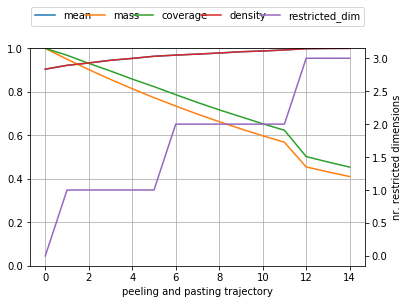

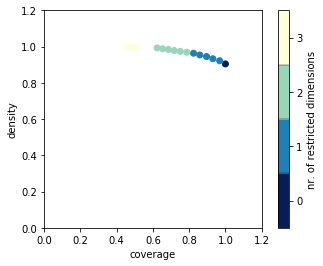

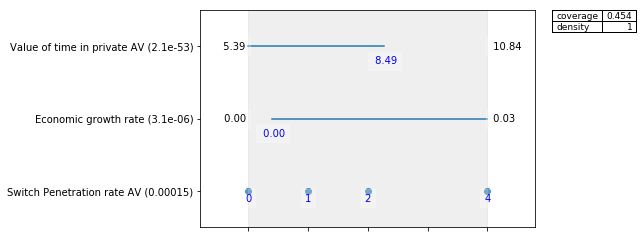

In [33]:
#perform prim on modified results tuple
prim_obj = prim.setup_prim(results, classify, threshold=0.8, threshold_type=1)
box_1 = prim_obj.find_box()
box_1.show_ppt()
box_1.show_tradeoff()
box_1.inspect(style='graph', boxlim_formatter="{: .2f}")
box_1.inspect()# Gives min, max and qp values of each restricted dimension
#select box according to peeling and pasting trajectory
box_1.select(12)
box_1.write_ppt_to_stdout()
#box_1.show_pairs_scatter()#TypeError: float() argument must be a string or a number, not 'set'

#print prim to std_out
print(prim_obj.stats_to_dataframe())
print(prim_obj.boxes_to_dataframe())

#visualize
prim_obj.display_boxes()
plt.show()

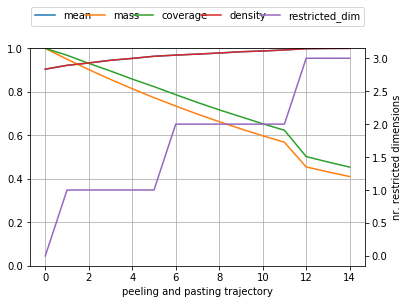

In [34]:
fig = box_1.show_ppt()
fig

# plt.draw()
# plt.savefig(r'figs/PRIM/PRIMpptdecreasedparkinglow0.99_cc.png', bbox_inches = 'tight')
plt.show()

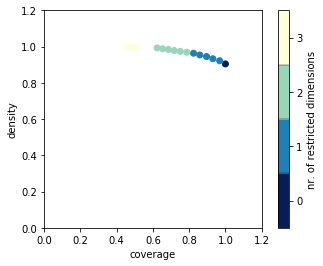

In [35]:
fig = box_1.show_tradeoff()
fig


#plt.draw()
#plt.savefig(r'figs/uncertainties/PRIMpptaccessibility_cc.png', bbox_inches = 'tight')

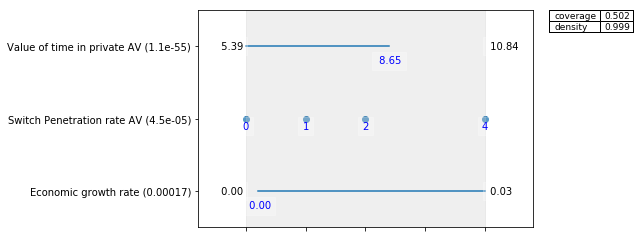

In [36]:
fig = box_1.inspect(style='graph', boxlim_formatter="{: .2f}")

# plt.draw()
# plt.savefig(r'figs/PRIM/PRIMboxesdecreasedparkinglow0_1045_ud.png', bbox_inches = 'tight')
fig

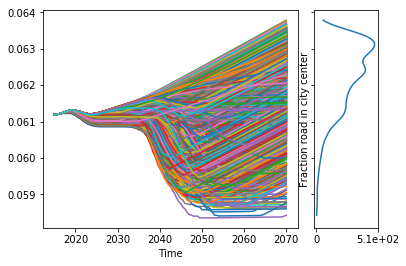

In [42]:
data = results
lines(data, 'Fraction road per district type[City center]', density=KDE, titles=None,
     ylabels=False)
plt.ylabel('Fraction road in city center')
plt.draw()
plt.show()
# plt.draw()
#plt.savefig(r'figs/uncertainties/Fraction road cc.png')

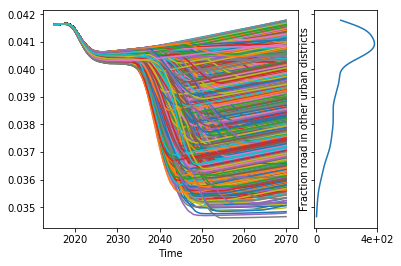

In [73]:
data = results
lines(data, 'Fraction road per district type[Other urban districts]', density=KDE, titles=False, 
      ylabels=None)
#plt.show()
plt.ylabel('Fraction road in other urban districts')
plt.draw()
plt.savefig(r'figs/uncertainties/Fraction road ud.png')
plt.show()

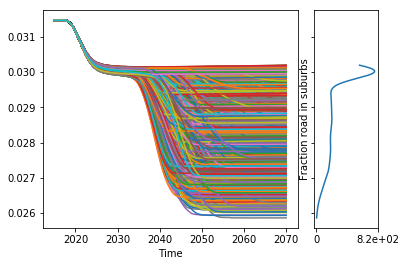

In [75]:
data = results
lines(data, 'Fraction road per district type[Suburbs]', density=KDE, titles=False, 
      ylabels=None)
#plt.show()
plt.ylabel('Fraction road in suburbs')
plt.draw()
plt.savefig(r'figs/uncertainties/Fraction road sb.png')
plt.show()

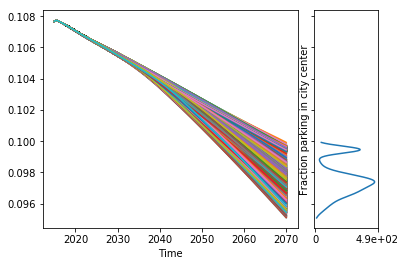

In [77]:
data = results
lines(data, 'Fraction parking per district type[City center]', density=KDE, titles=False, 
      ylabels=None)
#plt.show()
plt.ylabel('Fraction parking in city center')
plt.draw()
plt.savefig(r'figs/uncertainties/Fraction parking cc.png')
plt.show()

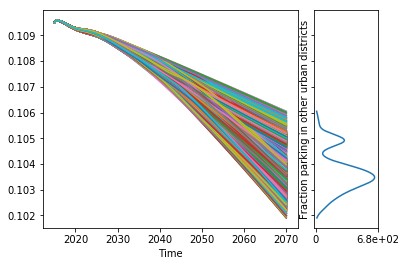

In [79]:
data = results
lines(data, 'Fraction parking per district type[Other urban districts]', density=KDE, titles=False, 
      ylabels=None)
plt.ylabel('Fraction parking in other urban districts')
#plt.show()
plt.draw()
plt.savefig(r'figs/uncertainties/Fraction parking ud.png')
plt.show()

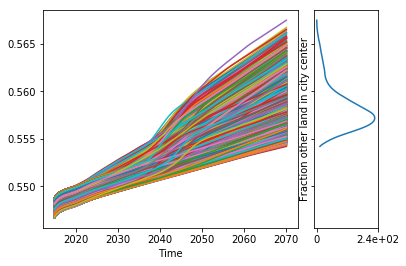

In [113]:
data = results
lines(data, 'Fraction other land per district type[City center]', density=KDE, titles=False, 
      ylabels=None)
plt.ylabel('Fraction other land in city center')
#plt.show()
plt.draw()
plt.savefig(r'figs/uncertainties/Fraction other cc.png')
plt.show()

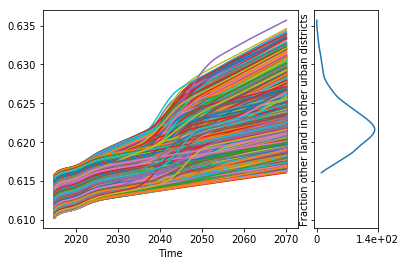

In [114]:
data = results
lines(data, 'Fraction other land per district type[Other urban districts]', density=KDE, titles=False, 
      ylabels=None)
plt.ylabel('Fraction other land in other urban districts')
#plt.show()
plt.draw()
plt.savefig(r'figs/uncertainties/Fraction other ud.png')
plt.show()

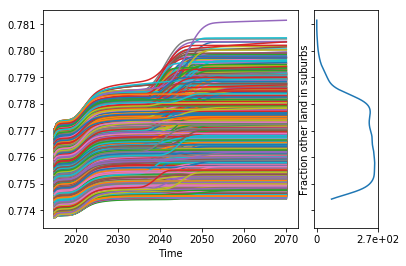

In [115]:
data = results
lines(data, 'Fraction other land per district type[Suburbs]', density=KDE, titles=False, 
      ylabels=None)
plt.ylabel('Fraction other land in suburbs')
#plt.show()
plt.draw()
plt.savefig(r'figs/uncertainties/Fraction other sb.png')
plt.show()

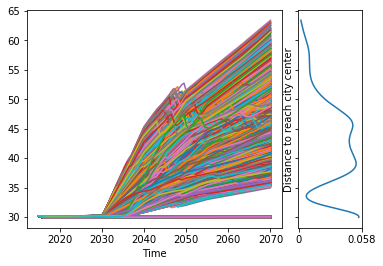

In [83]:
data = results
lines(data, 'Distance within acceptable travel time per district type[City center]', density=KDE, titles=False, 
      ylabels=None)
plt.ylabel('Distance to reach city center')
#plt.show()
plt.draw()
plt.savefig(r'figs/uncertainties/Acceptabledistance cc.png')
plt.show()

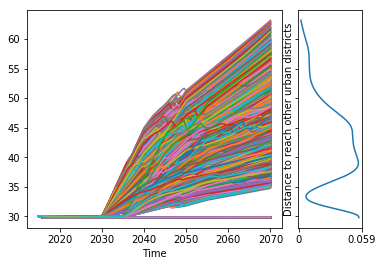

In [85]:
data = results
lines(data, 'Distance within acceptable travel time per district type[Other urban districts]', density=KDE, titles=False, 
      ylabels=None)
plt.ylabel('Distance to reach other urban districts')
#plt.show()
plt.draw()
plt.savefig(r'figs/uncertainties/Acceptabledistance ud.png')
plt.show()

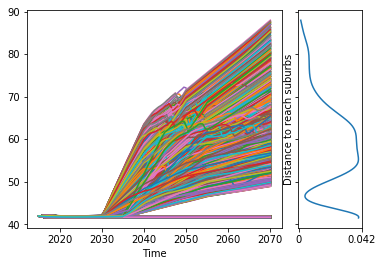

In [87]:
data = results
lines(data, 'Distance within acceptable travel time per district type[Suburbs]', density=KDE, titles=False, 
      ylabels=None)
plt.ylabel('Distance to reach suburbs')
#plt.show()
plt.draw()
plt.savefig(r'figs/uncertainties/Acceptabledistance sb.png')
plt.show()

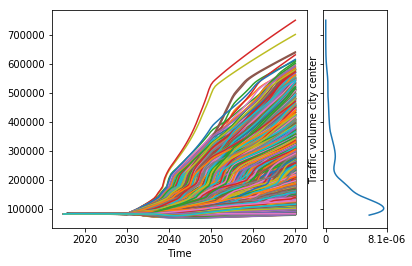

In [89]:
data = results
lines(data, 'Total traffic volume in morning peak per district type[City center]', density=KDE, titles=False,
      ylabels=None)
plt.ylabel('Traffic volume city center')
# plt.show()
plt.draw()
plt.savefig(r'figs/uncertainties/Trafficvolume cc.png')
plt.show()

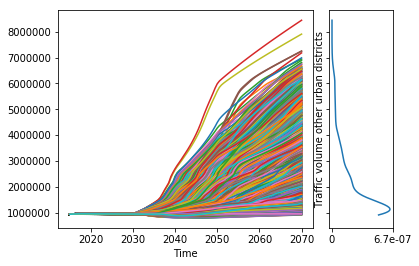

In [93]:
data = results
lines(data, 'Total traffic volume in morning peak per district type[Other urban districts]', density=KDE, titles=False, 
      ylabels=None)
plt.ylabel('Traffic volume other urban districts')
#plt.show()
plt.draw()
plt.savefig(r'figs/uncertainties/Trafficvolume ud.png')
plt.show()

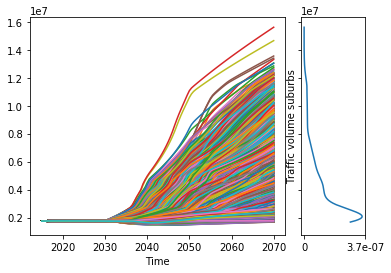

In [95]:
data = results
lines(data, 'Total traffic volume in morning peak per district type[Suburbs]', density=KDE, titles=False, 
      ylabels=None)
plt.ylabel('Traffic volume suburbs')
#plt.show()
plt.draw()
plt.savefig(r'figs/uncertainties/Trafficvolume sb.png')
plt.show()

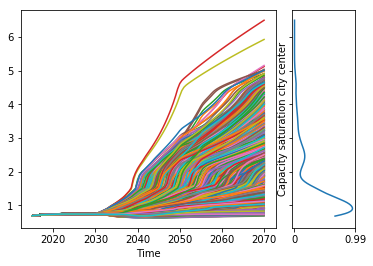

In [98]:
data = results
lines(data, 'Actual road capacity use compared to initial optimal per district type[City center]', density=KDE, titles=False, 
      ylabels=None)
plt.ylabel('Capacity saturation city center')
#plt.show()
plt.draw()
plt.savefig(r'figs/uncertainties/Capacitysaturation cc.png')
plt.show()

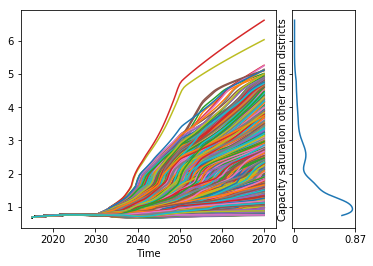

In [100]:
data = results
lines(data, 'Actual road capacity use compared to initial optimal per district type[Other urban districts]', density=KDE, titles=False, 
      ylabels=None)
plt.ylabel('Capacity saturation other urban districts')
#plt.show()
plt.draw()
plt.savefig(r'figs/uncertainties/Capacitysaturation ud.png')
plt.show()

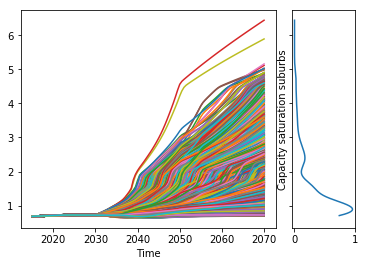

In [102]:
data = results
lines(data, 'Actual road capacity use compared to initial optimal per district type[Suburbs]', density=KDE, titles=False, 
      ylabels=None)
plt.ylabel('Capacity saturation suburbs')
#plt.show()
plt.draw()
plt.savefig(r'figs/uncertainties/Capacitysaturation sb.png')
plt.show()

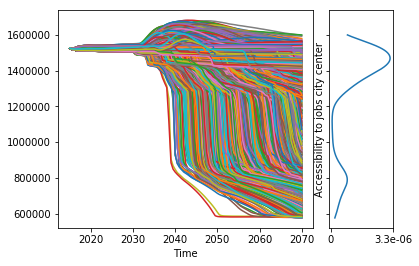

In [109]:
data = results
lines(data, 'Accessibility to jobs per district type[City center]', density=KDE, titles=False, 
      ylabels=None)
plt.ylabel('Accessibility to jobs city center')
#plt.show()
plt.draw()
plt.savefig(r'figs/uncertainties/Accessibilityjobs cc.png')
plt.show()

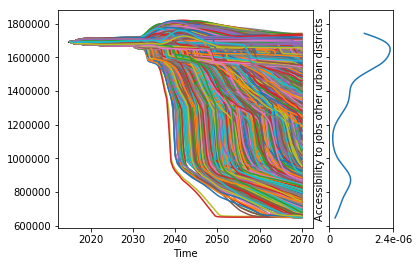

In [107]:
data = results
lines(data, 'Accessibility to jobs per district type[Other urban districts]', density=KDE, titles=False, 
      ylabels=None)
plt.ylabel('Accessibility to jobs other urban districts')
#plt.show()
plt.draw()
plt.savefig(r'figs/uncertainties/Accessibilityjobs ud.png')
plt.show()

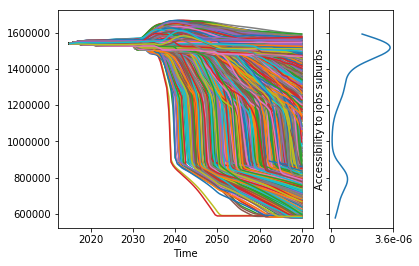

In [108]:
data = results
lines(data, 'Accessibility to jobs per district type[Suburbs]', density=KDE, titles=False, 
      ylabels=None)
plt.ylabel('Accessibility to jobs suburbs')
#plt.show()
plt.draw()
plt.savefig(r'figs/uncertainties/Accessibilityjobs sb.png')
plt.show()

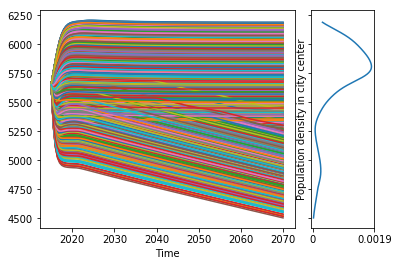

In [110]:
data = results
lines(data, 'Population density per district type[City center]', density=KDE, titles=False, 
      ylabels=None)
plt.ylabel('Population density in city center')
#plt.show()
plt.draw()
plt.savefig(r'figs/uncertainties/Populationdensity cc.png')
plt.show()

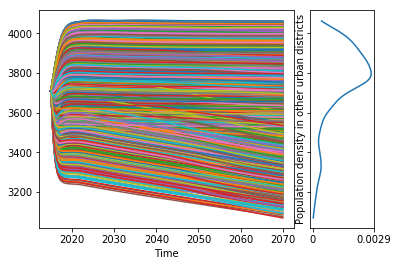

In [111]:
data = results
lines(data, 'Population density per district type[Other urban districts]', density=KDE, titles=False, 
      ylabels=None)
plt.ylabel('Population density in other urban districts')
#plt.show()
plt.draw()
plt.savefig(r'figs/uncertainties/Populationdensity ud.png')
plt.show()

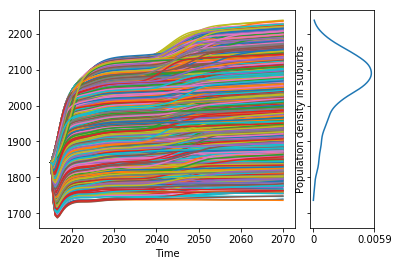

In [112]:
data = results
lines(data, 'Population density per district type[Suburbs]', density=KDE, titles=False, 
      ylabels=None)
plt.ylabel('Population density in suburbs')
#plt.show()
plt.draw()
plt.savefig(r'figs/uncertainties/Populationdensity sb.png')
plt.show()

In [ ]:
import ema_workbench

In [43]:
grouping_specifiers_vot={'Low value of time': (5.39, 7.20), 
                     'High value of time': (9.58, 10.84)
                     }
grouping_specifiers_sav={'Low carsharing': (0, 0.05), 
                    'High carsharing': (0.27, 0.999999),
                     }

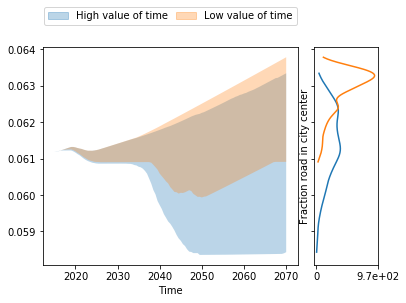

In [44]:
#use for plotting of several steps in uncertainties, group by = value of time in private AV, carsharing rate
#faseplot, specify group_by and grouping_specifiers
data = results
envelopes(data, 'Fraction road per district type[City center]',  
          group_by='Value of time in private AV', grouping_specifiers=grouping_specifiers_vot, titles=False, 
       legend=True, density=KDE, ylabels=None, fill=True, )
plt.ylabel('Fraction road in city center')


fig = plt.draw()
#plt.savefig(r'figs/grouping/vot_Fractionroad cc.png', bbox_inches='tight')

plt.show()

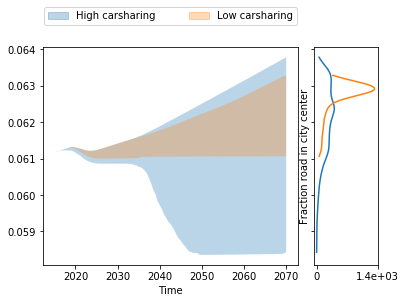

In [48]:
#use for plotting of several steps in uncertainties, group by = value of time in private AV, carsharing rate
#faseplot, specify group_by and grouping_specifiers
data = results
envelopes(data, 'Fraction road per district type[City center]',  
          group_by='Carsharing rate', grouping_specifiers=grouping_specifiers_sav, titles=False, 
       legend=True, density=KDE, ylabels=None, fill=True, )
plt.ylabel('Fraction road in city center')


fig = plt.draw()
#plt.savefig(r'figs/grouping/vot_Fractionroad cc.png', bbox_inches='tight')

plt.show()

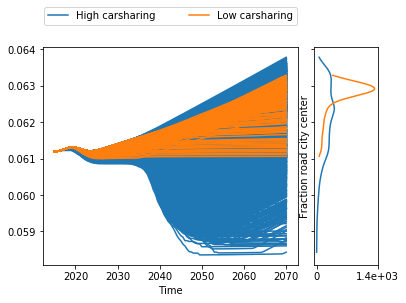

In [46]:
#use for plotting of several steps in uncertainties, group by = value of time in private AV, carsharing rate
#faseplot, specify group_by and grouping_specifiers
data = results
lines(data, 'Fraction road per district type[City center]',  
          group_by='Carsharing rate', grouping_specifiers=grouping_specifiers_sav, titles=False, 
       legend=True, density=KDE, ylabels=None)
plt.ylabel('Fraction road city center')

plt.show()
# plt.draw()
# plt.savefig(r'figs/grouping/sharing_Fractionroad ud.png')

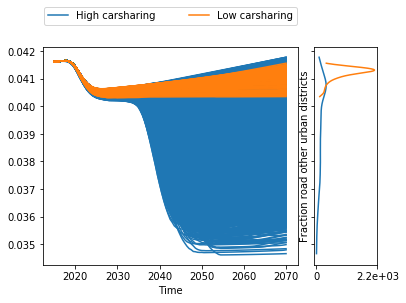

In [47]:
#use for plotting of several steps in uncertainties, group by = value of time in private AV, carsharing rate
#faseplot, specify group_by and grouping_specifiers
data = results
lines(data, 'Fraction road per district type[Other urban districts]',  
          group_by='Carsharing rate', grouping_specifiers=grouping_specifiers_sav, titles=False, 
       legend=True, density=KDE, ylabels=None)
plt.ylabel('Fraction road other urban districts')



plt.show()
# plt.draw()
# plt.savefig(r'figs/uncertainties/Accessibilityjobs ud.png')

In [52]:
import ema_workbench.analysis.pairs_plotting as pairs
box_1.select(30)
fig = box_1.show_pairs_scatter()
#fig.savefig(r'figs/PRIMscatterpopdenssuburbs.png')
